# Estimation and Sampling Pair Sprint Solutions
### Read and understand the code in afternoon_soln.py to follow the narrative of the solutions presented in this notebook.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Part 1: Central Limit Theorem

In [2]:
def make_draws(dist, params, size=200):
    """
    Draw samples of random variables from a specified distribution
    with given parameters and return these in an array.

    Parameters
    ----------

    dist: scipy.stats distribution object:
      Distribution object from scipy.stats, must have a .rvs method
    
    params: dict:
      Parameters needed to define the distribution dist.
    For example, if dist = scipy.stats.binom, then params could be
      
          {'n': 100, 'p': 0.25}
    
    size: int:
      The number of samples to draw

    Returns
    -------
    samples: np.array, shape (size, )
      An i.i.d sample from the specified distribution. 
    """
    return dist(**params).rvs(size) 

In [3]:
# Binomial(n, p)
binom_rvs = make_draws(stats.binom, {'n': 100, 'p': 0.1})

# Uniform(a, b), here: a = loc, b = loc+scale
unif_rvs = make_draws(stats.uniform, {'loc': 10, 'scale': 20}) 

# Poisson(lambda), here: lambda = mu
poisson_rvs = make_draws(stats.poisson, {'mu': 2}) 

# Exponential(lambda), here: lambda = 1 / scale
expon_rvs = make_draws(stats.expon, {'scale': 2})

# Geometric(p)
geom_rvs = make_draws(stats.geom, {'p': 0.1})

2. Now that you are comfortable drawing samples from various distributions, let's explore some behaviour of samples. Implement a plot_means function that takes the same parameters as `make_draws` but adds two extra parameters:

`ax`: pyplot.Axis object. The asis to draw a plot on.

`repeat`: int. The number of samples of size size to draw.

The plot_means function should draw repeat number of sample of size size, and compute the means of each of those samples. Then it should draw a histogram of the resulting sample means on the supplied ax.

In [32]:
def plot_means(ax, dist, dist_name, params,  size=200, repeat=5000):
    samples = np.zeros((repeat, size))
    for idx in range(repeat):
        samples[idx, :] = make_draws(dist, params, size=size)
    sample_means = np.mean(samples, axis=1)
    ax.hist(sample_means, bins=25)
    ax.set_xlabel("mean")
    ax.set_ylabel("count")
    ax.set_title(f"Sample means of randomly generated data from a {dist_name} distribution")

3. Call `plot_means()` with at least each of the following distributions: 
   - Binomial
   - Poisson 
   - Exponential
   - Geometric
   - Uniform

   Try out different parameter settings for each of the distributions, as well 
   as varying the `size` and `repeat` choices. Initial choices for the `size` 
   and `repeat` might be 200 and 5000. If the distribution of means resembles 
   a normal distribution regardless of the distribution you have specified, 
   you have some evidenve for the central limit theorem! (Failure to observe this phenomenon means 
   because of the asymmetry and skew of the distribution of the data being 
   sampled more samples are needed before the CLT effect will begin to emerge!)


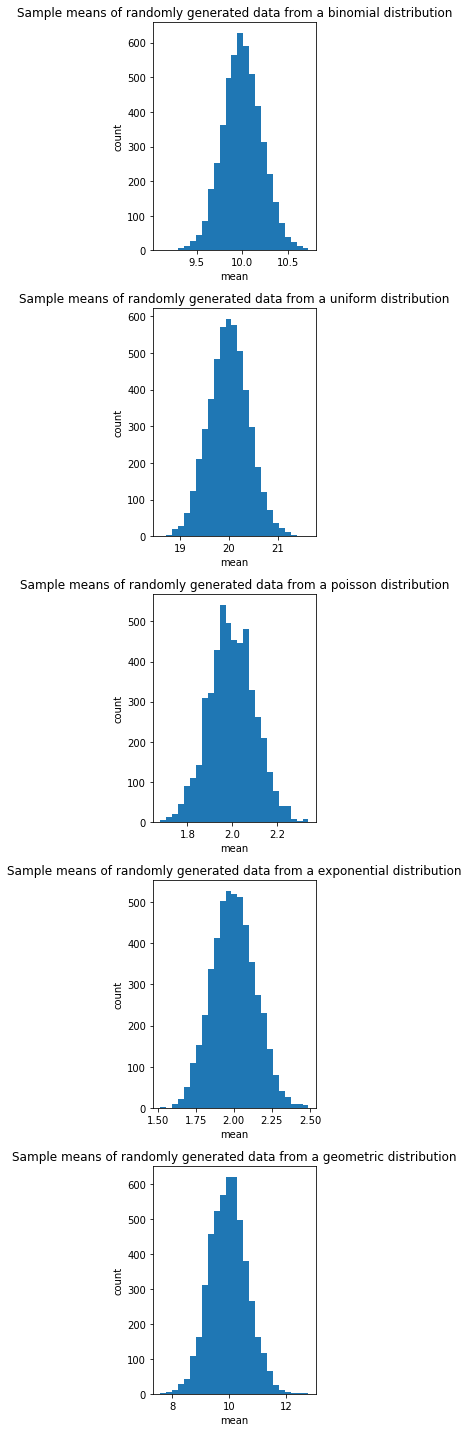

In [33]:

fig, axs = plt.subplots(5, 1, figsize=(5, 20))

plot_means(axs[0], stats.binom, "binomial", {'n': 100, 'p': 0.1})
plot_means(axs[1], stats.uniform, "uniform", {'loc': 10, 'scale': 20}) 
plot_means(axs[2], stats.poisson, "poisson", {'mu': 2}) 
plot_means(axs[3], stats.expon, "exponential", {'scale': 2})
plot_means(axs[4], stats.geom, "geometric",{'p': 0.1})
plt.tight_layout()

4. What do you observe if you change the sample `size` to 10 instead of 200,
keeping `repeat` constant at 5000? Explain your observation on a high 
level. Should the CLT apply when your sample `size` is small with a large 
value for `repeat`?  Hint: this is best answered by distinguishing
between the role of the of the `size` and the `repeat` variable.


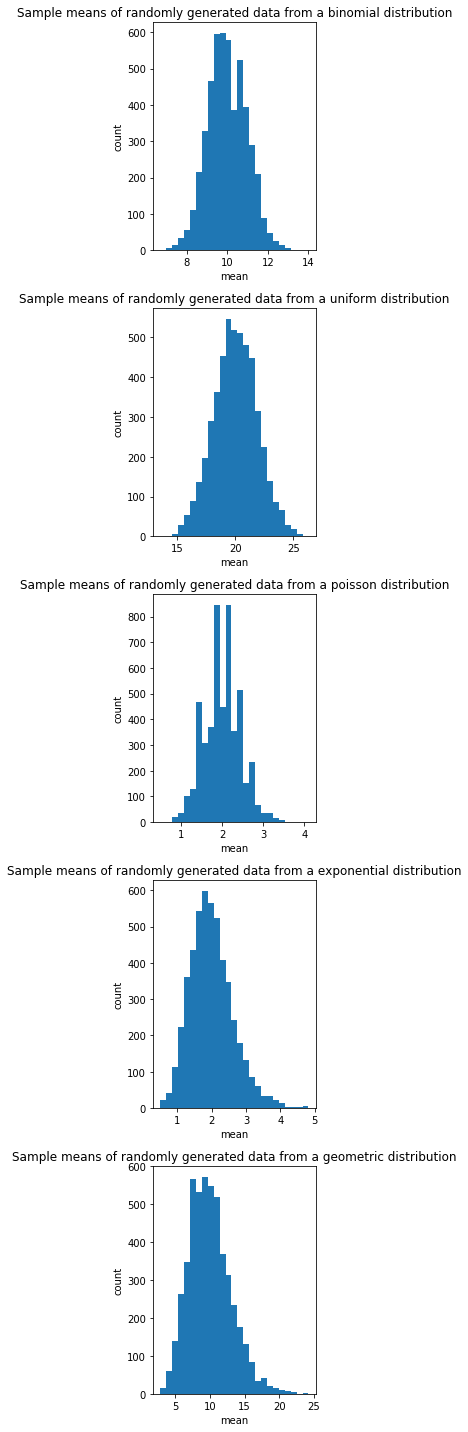

In [34]:
fig, axs = plt.subplots(5, 1, figsize=(5, 20))

plot_means(axs[0], stats.binom, "binomial", {'n': 100, 'p': 0.1}, size=10)
plot_means(axs[1], stats.uniform, "uniform", {'loc': 10, 'scale': 20}, size=10) 
plot_means(axs[2], stats.poisson, "poisson", {'mu': 2}, size=10) 
plot_means(axs[3], stats.expon, "exponential", {'scale': 2}, size=10)
plot_means(axs[4], stats.geom, "geometric", {'p': 0.1}, size=10)
plt.tight_layout()

> With a sample size of 10, we see some significant deviations from normality. The mean of samples drawn from a distribution only converge to a normal distribution as the sample size increases, but there is no guarentees on the rate of that convergence.  Depending on how non-normal the population is, the rate of convergence may be slow.

5. Instead of taking the mean of the samples, take the maximum of each of the 
samples and plot the histograms again. Do they resemble the normal 
distribution? Do all sample statistics follow a normal distribution?  In
your answer clarify the sample statistics to which the CLT applies.

> We'll need to generalize our `plot_means` function so that it can handle other reduction operations besides the sample mean.

In [39]:
def plot_statistic(ax, dist, dist_name, params, size=200, repeat=5000, statistic=np.mean):
    samples = np.zeros((repeat, size))
    for idx in range(repeat):
        samples[idx, :] = make_draws(dist, params, size=size)
    sample_statistic = statistic(samples, axis=1)
    ax.hist(sample_statistic, bins=25)
    ax.set_xlabel(statistic.__name__)
    ax.set_ylabel("count")
    ax.set_title (f"sample {statistic.__name__} from randomly generated {dist_name} data")

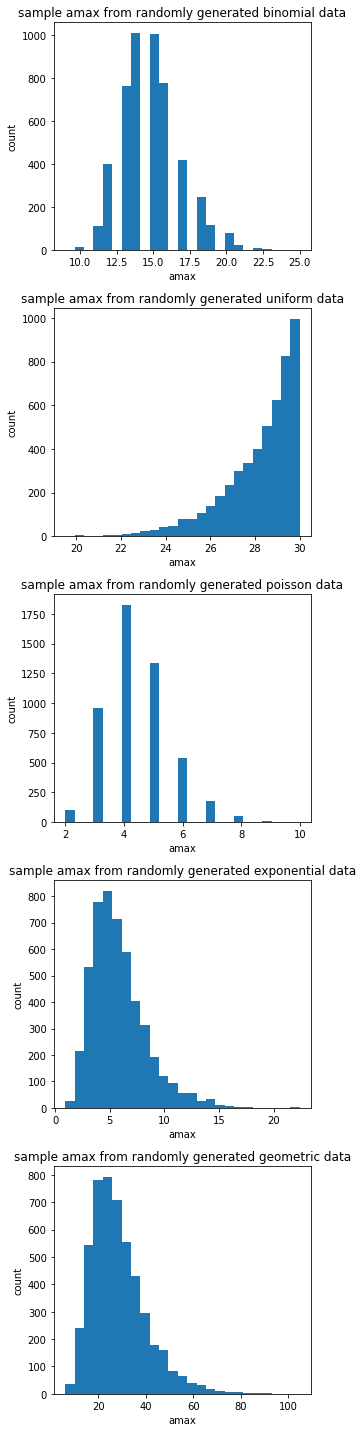

In [41]:
fig, axs = plt.subplots(5, 1, figsize=(5, 20))

plot_statistic(axs[0], stats.binom, "binomial",  {'n': 100, 'p': 0.1}, size=10, statistic=np.max)
plot_statistic(axs[1], stats.uniform, "uniform", {'loc': 10, 'scale': 20}, size=10, statistic=np.max) 
plot_statistic(axs[2], stats.poisson, "poisson", {'mu': 2}, size=10, statistic=np.max) 
plot_statistic(axs[3], stats.expon, "exponential", {'scale': 2}, size=10, statistic=np.max)
plot_statistic(axs[4], stats.geom, "geometric", {'p': 0.1}, size=10, statistic=np.max)
plt.tight_layout()

> The maximum of a sample from a distribution definitely does NOT obey the *Central* Limit. The CLT only applies to sample means (technically for any scaled sum), and not explicitly for any other statistic.

## Part 1: Population Inference and Confidence Interval
- Load, compute mean of Google's lunch-hour survey:

In [42]:
## Change path to lunch_hour.txt here:
lunch = np.loadtxt('lunch_hour.txt')

print("Lunch hour sample mean: ", lunch.mean())

Lunch hour sample mean:  2.1845


2. Viewing the lunch our data as an i.i.d sample from the lunch hours of ALL Google employees, the sample mean is a random varaible, and we have a single draw from it.  What is the distribution of this sample mean random variable, and how do you know? 

> According to the central limit theorem, any sample mean of a sufficiently large sample is normally distributed.

3. Compute the [standard error](http://en.wikipedia.org/wiki/Standard_error) of the sample mean. Based on the standard error and the sample mean, compute the [95% confidence interval](http://dsearls.org/courses/M120Concepts/ClassNotes/Statistics/530G_Derivation.htm) for the population mean lunch break length.

In [43]:
se = np.std(lunch) / np.sqrt(len(lunch))
print(f"Standard Error of Lunch Hour: {se:2.2f}")

Standard Error of Lunch Hour: 0.04


In [45]:
# calculation of 95% CI
sample_mean = lunch.mean()
lunch_means_distribution = stats.norm(sample_mean, se)
lower, upper = lunch_means_distribution.ppf(0.025),lunch_means_distribution.ppf(0.975)

In [46]:
print(f'Lower 95% CI: {lower:2.2f}')
print(f'Upper 95% CI: {upper:2.2f}')

Lower 95% CI: 2.10
Upper 95% CI: 2.26


4. Interpret what the 95% confidence interval implies about the lunch hours of Google employees in general.

> If we hypothetically ran this survey of employee lunches 100 times and computed the 95% CI each time we would expect that 95 of those 100 CI would contain the true population mean.

> Note that the chance/randomness here is about the sampling and interval construction procedure -- not the population parameter (i.e. the population mean)!  There is no randomness or variation associated with the parameter in the confidence interval framework.  Saying there is a 95% chance the parameter is in the interval suggests that sometimes it will be in the interval and sometimes it won't.  But this is NOT the case.  Either it *is* or it *is not* in the interval.  We don't know.  But we do know it's a 95% confidence interval so hypothetically 95% of the time these intervals capture the true population mean. Therefore, 95% confidence intervals give us a reasonable range for our uncertainty about what we think the parameter might be. Here it seems google employees likely have a two hour and ten minute lunch break, give or take about five minutes.

5. If the sample size were smaller, how would that affect the 95% CI? Explain your answer.  Suppose the sample size was 10, does your assumption from `2.` still hold? Explain your answer.

> If the sample size is smaller, the CI will be wider since the sample standard deviation is larger and hence there is more uncertainty associated with the sample mean.  If the sample size is 10, we likely cannot leverage the interval computation as the sampling distribution of the mean might not yet well approximate a normal distribution. 

> (Note: We will introduce a new t-test method for calculating CIs that addresses the situation of small sample sizes tomorrow with Frequentist Hypothesis Testing. But seriously, get a larger sample than 10 observations.)